## Cytokine Dataset - Multilabel Prediction of Autoimmune diseases

### Resources

tensorflow doc for multiclass / multilabel: https://scikit-learn.org/stable/modules/multiclass.html#error-correcting-output-codes

http://scikit.ml/multilabelembeddings.html

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/


In [1]:
import pandas as pd 
import numpy as np



In [2]:
df = pd.read_csv("SLE_cytokines.csv")
#remove empty column and patient code
df.drop(df.columns[[0,4]], inplace = True, axis = 1)
#remove patients with non labled diseases (NaN)
df.dropna(inplace=True)
df

,Systemic Lupus based on SLICC criteria,Discoid Lupus,Arthritis,TNF-α (pg/ml),IL-13 (pg/ml),IL-4 (pg/ml),IL-10 (pg/ml),IL-6 (pg/ml),IL-2 (pg/ml),TNF-β (pg/ml),...,PTX3 (pg/ml),sCD40L (pg/ml),sCD25 (IL-2Ra) (pg/ml),CXCL12 (pg/ml),sST2 (pg/ml),sTNF-RI (pg/ml),sTNF-RII (pg/ml),sRAGE (pg/ml),CX3CL1 (pg/ml),sCD130 (gp130) (pg/ml)
1,Yes,Yes,Yes,24.02,7.89,25.21,2.69,15.44,209.24,292.78,...,4319.1,19623.33,2849.39,320.6,180.5,801.54,199.23,122.1,5269.5,50168.6
2,Yes,No,Yes,10.56,6.77,1.99,1.76,15.44,157.44,16.09,...,4690.7,29593.44,13212.98,965.2,276.0,3613.53,211.13,607.9,1453.0,122909.9
3,Yes,No,No,1.72,6.77,23.52,3.01,4.83,234.01,105.30,...,6911.7,23946.93,4378.48,1941.9,236.6,1963.86,97.67,99.8,1856.8,166542.3
4,Yes,Yes,Yes,5.06,6.77,4.40,1.76,29.41,258.23,16.09,...,6593.1,43790.62,3833.76,1626.4,316.7,844.37,103.46,144.5,2102.9,108095.8
6,Yes,No,Yes,19.90,7.16,8.13,1.76,22.29,350.85,68.78,...,7861.5,53548.82,2418.00,532.3,96.9,1349.30,84.25,307.9,1453.0,108581.4
8,Yes,No,Yes,6.35,6.77,1.99,1.19,42.94,362.04,16.09,...,6524.3,63694.21,1357.44,793.6,198.8,827.08,183.40,228.0,1453.0,71555.1
9,Yes,Yes,Yes,1.72,6.77,1.99,1.76,15.44,221.70,16.09,...,3726.9,37634.44,1616.10,666.3,128.5,1026.02,98.45,162.3,1453.0,91550.9
10,Yes,No,Yes,23.19,7.89,79.37,5.09,19.98,281.96,683.58,...,5709.3,33524.36,1859.21,956.3,236.6,1244.14,103.93,206.3,2790.9,116660.0
11,Yes,No,Yes,9.11,12.50,25.21,3.35,17.69,293.67,299.34,...,5235.0,51516.35,1895.05,617.6,534.4,925.67,60.16,162.3,2339.8,118287.5
13,Yes,No,Yes,3.83,6.77,18.52,1.76,4.10,68.17,16.09,...,1979.7,5624.76,1818.15,781.4,236.6,673.95,196.25,144.5,1599.6,77771.9


In [3]:
#normalise data to range(0,1)
df[df.columns[3:]]= df[df.columns[3:]].apply(lambda x: (x-min(x))/(max(x)-min(x)), axis =0)
#transform labels
df[df.columns[:3]] = df[df.columns[:3]].replace(to_replace=["Yes", "No"], value=[1,0])
df

,Systemic Lupus based on SLICC criteria,Discoid Lupus,Arthritis,TNF-α (pg/ml),IL-13 (pg/ml),IL-4 (pg/ml),IL-10 (pg/ml),IL-6 (pg/ml),IL-2 (pg/ml),TNF-β (pg/ml),...,PTX3 (pg/ml),sCD40L (pg/ml),sCD25 (IL-2Ra) (pg/ml),CXCL12 (pg/ml),sST2 (pg/ml),sTNF-RI (pg/ml),sTNF-RII (pg/ml),sRAGE (pg/ml),CX3CL1 (pg/ml),sCD130 (gp130) (pg/ml)
1,1,1,1,0.300701,0.018316,0.300078,0.111940,0.058053,0.480042,0.414523,...,0.141683,0.241066,0.125844,0.000000,0.241047,0.046062,0.860315,0.034606,0.570044,0.000000
2,1,0,1,0.119202,0.000000,0.000000,0.042537,0.058053,0.303774,0.000000,...,0.164189,0.412759,1.000000,0.397582,0.445850,1.000000,0.933931,0.788485,0.000000,0.625066
3,1,0,0,0.000000,0.000000,0.278237,0.135821,0.003737,0.564331,0.133650,...,0.298701,0.315522,0.254821,1.000000,0.361355,0.440367,0.232045,0.000000,0.060313,1.000000
4,1,1,1,0.045038,0.000000,0.031145,0.042537,0.129569,0.646749,0.000000,...,0.279405,0.657245,0.208875,0.805403,0.533133,0.060592,0.267863,0.069367,0.097071,0.497769
6,1,0,1,0.245146,0.006378,0.079349,0.042537,0.093120,0.961922,0.078938,...,0.356224,0.825289,0.089457,0.130574,0.061763,0.231884,0.149026,0.322936,0.000000,0.501942
8,1,0,1,0.062433,0.000000,0.000000,0.000000,0.198833,1.000000,0.000000,...,0.275238,1.000000,0.000000,0.291741,0.280292,0.054726,0.762388,0.198945,0.000000,0.183774
9,1,1,1,0.000000,0.000000,0.000000,0.042537,0.058053,0.522442,0.000000,...,0.105817,0.551231,0.021818,0.213224,0.129530,0.122214,0.236870,0.096989,0.000000,0.355598
10,1,0,1,0.289509,0.018316,1.000000,0.291045,0.081294,0.727499,1.000000,...,0.225879,0.480452,0.042324,0.392093,0.361355,0.196209,0.270770,0.165270,0.199833,0.571361
11,1,0,1,0.099649,0.093704,0.300078,0.161194,0.069571,0.767346,0.424351,...,0.197153,0.790288,0.045347,0.183186,1.000000,0.088172,0.000000,0.096989,0.132455,0.585346
13,1,0,1,0.028452,0.000000,0.213621,0.042537,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038860,0.284216,0.361355,0.002778,0.841881,0.069367,0.021897,0.237195


### TO DO: check variance of features and remove columns with low variance

In [4]:
# transform data into np.array

data = df.values
X = data[:,3:]
y = data[:,0:3].astype(int)

## Analysis to figure out how each Cytokine is affecting each disease separately

Run logistic regression for each disease separately

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# prepare target data

target = [0,0,0]

for disease in range(0,3):
    target[disease] = df[df.columns[disease]].to_numpy()

# build model
logRegr = linear_model.LogisticRegression()

# run regression for each disease
dis_coeffs = []

for disease in range(0,3):
    model = logRegr.fit(X,target[disease])
    dis_coeffs.append(model.coef_) 

dis_coeffs


[array([[ 0.15866764,  0.06919961, -0.28496269, -0.17256071, -0.64676618,
         -0.06987812,  0.0471334 ,  0.12423434,  0.17948499, -0.19729584,
          0.1409948 , -0.18950693,  0.08733312, -0.47253897,  0.06087525,
          0.09782065,  0.09231433, -0.51474853,  0.0683896 ,  0.10030764,
         -0.15353261,  0.13083728,  0.1473683 ,  0.13304703, -0.29295315,
         -0.20560439,  0.23455357, -0.0937747 , -0.09248106, -0.02188761,
          0.1120646 ,  0.12460295,  0.28113961,  0.05765622,  0.09591965,
          0.27537473, -0.24311456,  0.02933559,  0.09496054, -0.00643631,
          0.10057176,  0.41941374,  0.17524045,  0.16100148, -0.06380212]]),
 array([[-0.0948762 , -0.16477289, -0.16156876,  0.03790651,  0.23356915,
         -0.48613986, -0.11285614,  0.00758903, -0.21106581, -0.08174294,
          0.17505053, -0.29547576, -0.07043725,  0.16391694, -0.16475839,
         -0.14218911, -0.11851441,  0.11298862, -0.10924907, -0.14892303,
          0.52029961, -0.2257737 , 

### Plot coeffiecients

<BarContainer object of 45 artists>

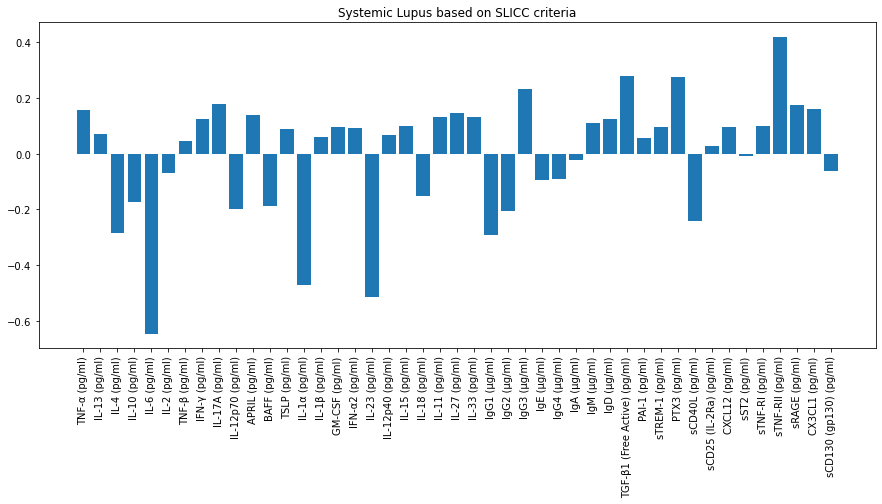

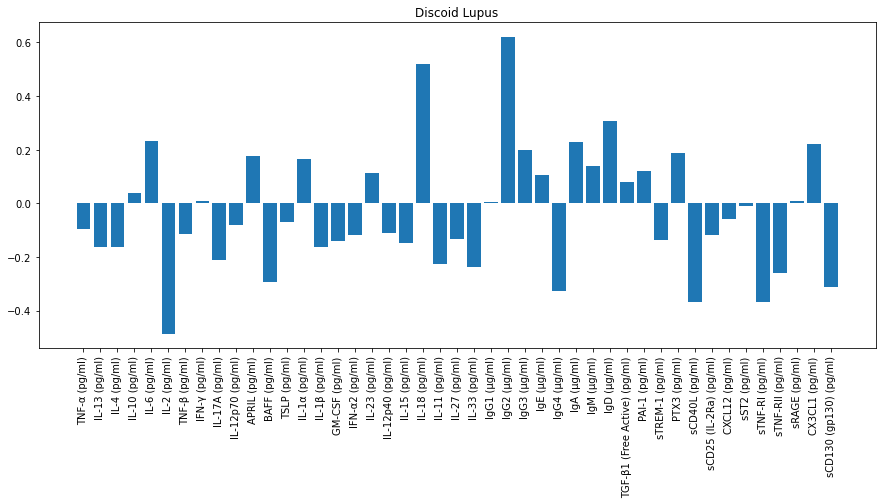

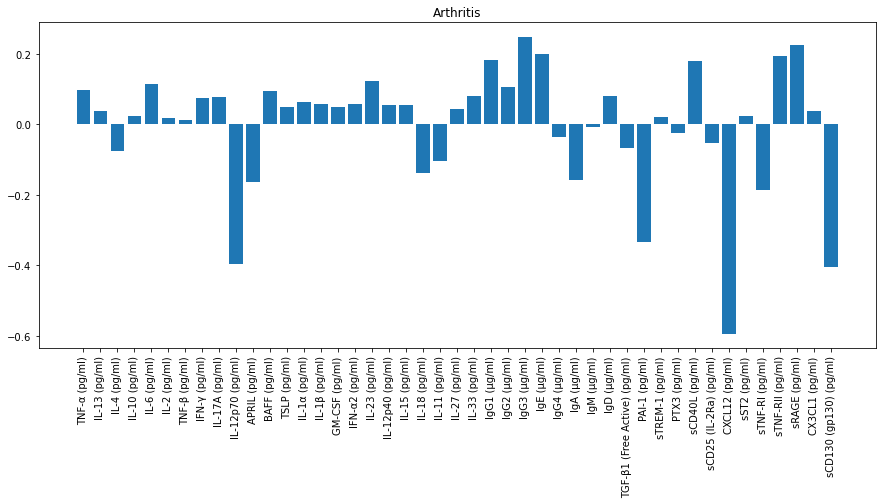

In [7]:
import matplotlib.pyplot as plt

ylabels = df.columns[3:]

plt.figure(figsize=(15,6))
plt.title(df.columns[0])
plt.xticks(rotation="vertical")
plt.bar(ylabels, dis_coeffs[0].flatten(order="C"))

plt.figure(figsize=(15,6))
plt.title(df.columns[1])
plt.xticks(rotation="vertical")
plt.bar(ylabels, dis_coeffs[1].flatten(order="C"))

plt.figure(figsize=(15,6))
plt.title(df.columns[2])
plt.xticks(rotation="vertical")
plt.bar(ylabels, dis_coeffs[2].flatten(order="C"))


## Comments

These plots give us an intution about which cytokines are positively or negatively correlated with the respective disease.

For positive coefficients: an increase of the cytokine level is likely to increase the odds of having the disease

For negatice coefficients: an increase of the cytokine level is likely to decrease the odds of having the disease

However, this analysis doesnt tell us if the three diseases are correlated with each other

## QLattice to explore realtionships between cytokines and diseases

In [14]:
import feyn
from sklearn.model_selection import train_test_split

ql = feyn.connect_qlattice()


random_seed = 42
train, test = train_test_split(df, test_size = 0.33, stratify=df[df.columns[0]], random_state=random_seed)

models = []

n_epochs = 5

A new Community QLattice has been allocated for you. This temporary QLattice is available for personal/non-commercial use. By using this Community QLattice you agree to the terms and conditions which can be found at https://abzu.ai/privacy.


In [15]:
for epoch in range(n_epochs):
    # Sample models from the QLattice, and add them to the list
    
    # Included the two other disease labels as features too in case they have predictive power 
    
    models += ql.sample_models(train.columns, train.columns[0], 'classification')

    # Fit the list of models. Returns a list of models sorted by loss or criterion.
    models = feyn.fit_models(models, train, 'binary_cross_entropy')

    # Remove redundant and poorly performing models from the list
    models = feyn.prune_models(models)

    # Find the 10 best and sufficiently diverse models
    best_models = feyn.best_diverse_models(models)

    # Display the best model in the current epoch
    feyn.show_model(best_models[0], label=f"Epoch: {epoch}", update_display=True)

    # Update QLattice with the 10 best and diverse models
    ql.update(best_models)

In [17]:
best = models[0]
best.plot(train, test)

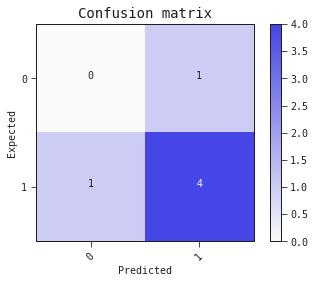

In [18]:
best.plot_confusion_matrix(test)

In [28]:
y_pred= best.predict(test).astype(int)
y_pred

array([0, 0, 1, 0, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test[test.columns[0]], y_pred)

acc

0.5

In [19]:
best.sympify(signif = 2)

SympifyError: Sympify of expression 'could not parse 'IL-12p70(pg/ml) * 2.382406397673573e+00 * -1.896717361767461e-02 + -6.259429964621289e-02'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [34]:
best1 = models[1]
best1.plot(train, test)

In [35]:
y_pred1= best1.predict(test).astype(int)
acc = accuracy_score(test[test.columns[0]], y_pred1)
acc

0.16666666666666666

### Note: Model 1 also identifies IL-6 as a strong predictor, similar to logistic regression, but has very low accuracy

## NEURAL NETWORK:  multilabel classification

- Number of nodes in the output layer matches the number of labels => each output node gives the probability that it belongs to the respective class
- Sigmoid activation for each node in the output layer to reflect the probability between 0 and 1
- Binary cross-entropy loss function.


In [10]:
input_dim = X.shape[1]
output_dim = y.shape[1]
print("Numer of input nodes: " + str(input_dim))
print("Numer of output nodes: " + str(output_dim))

Numer of input nodes: 45
Numer of output nodes: 3


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# define the model
model = Sequential()
model.add(layers.Dense(56, input_dim=input_dim, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(output_dim, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# create model in a funtion, so that it can be created new in the evaluation function (below)
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(layers.Dense(56, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(layers.Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                2576      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 171       
Total params: 2,747
Trainable params: 2,747
Non-trainable params: 0
_________________________________________________________________


**Using k-fold cross validation because of small dataset**

* use k-fold cross-validation instead of train/test splits of a dataset to get an unbiased estimate of model performance when making predictions on new data
* If the dataset is small, it is good practice to evaluate neural network models repeatedly on the same dataset and report the mean performance across the repeats

https://machinelearningmastery.com/k-fold-cross-validation/

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
        # define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		ypred = model.predict(X_test)
		# round probabilities to class labels
		ypred = ypred.round()
		#print(ypred)
		# calculate accuracy
		acc = accuracy_score(y_test, ypred)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results, model

In [13]:
result, fitted_model = evaluate_model(X,y)

>0.333
>0.333
>1.000
>0.667
>0.333
>0.000
>0.333
>0.333
>0.000
>0.667
>0.333
>0.333
>0.333
>0.667
>0.333
>0.667
>0.333
>0.333


In [14]:
print('Accuracy: %.3f (%.3f)' % (np.mean(result), np.std(result)))

Accuracy: 0.407 (0.237)


## Comments

We got now a model that predicts the 3 disease classes with around 40% Accuracy. Worse than a coin toss.

It also does not tell us anything about how diseases are correlated between each other or how cytokines are related to the diseases. For the latter, look at the logisitc regression above. It will help us to predict the diseases given a new sample of data.

One could try to tweak paramters like number of layers, width of layers or different optimizers to increase performance. But given the small dataset ...

## Lets try another model to see if we can get a better prediction

## SVM: multilabel classification

https://www.machinecurve.com/index.php/2020/11/12/how-to-create-a-multilabel-svm-classifier-with-scikit-learn/

In [16]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Support Vector Classifier (SVC)

Accuracy: 0.667


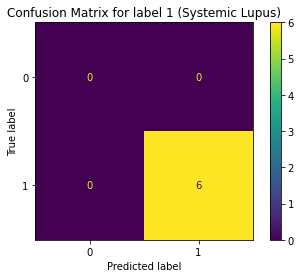

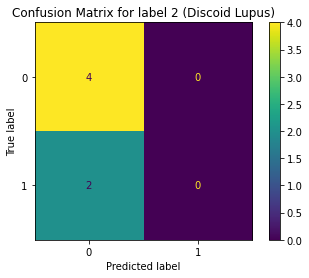

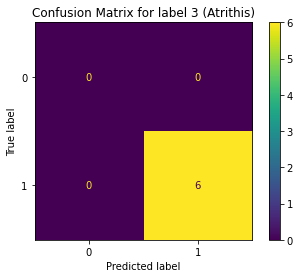

In [17]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the SVM
svm = SVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(X_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(X_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)

#Calculate accuracy
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.3f" % acc)

# Plotting matrices:
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (Systemic Lupus)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (Discoid Lupus)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3 (Atrithis)')
plt.show()

In [19]:
# K-fold Cross Validation

def get_SVCmodel():
    svm = SVC(random_state=42)
    multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)
    return multilabel_classifier

def evaluate_SVCmodel(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
        # define model
		model = get_SVCmodel()
		# fit model
		model.fit(X_train, y_train)
		# make a prediction on the test set
		ypred = model.predict(X_test)
		# calculate accuracy
		acc = accuracy_score(y_test, ypred)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results, model

In [20]:
result, model = evaluate_SVCmodel(X, y)

>0.333


ValueError: The number of classes has to be greater than one; got 1 class

## Comments

With an accuracy of 66% the SVC performed better than the NN. Although we could not perform K-fold cross validation because the splitting of the data results in test or train datasets that only have 1 class, which SVC cannot handle. Not being able to do k-fold cross validation gives us less confidence in the robustness of the accuracy score.

Also, the random number needs to be chosen in a way that the data is split in a way to have more than 1 class in the train/test set (42 works, 1 doesnt for example)

## RANDOM FOREST: multilabel classification

https://scikit-learn.org/stable/modules/tree.html#multi-output-problems



Accuracy: 0.667


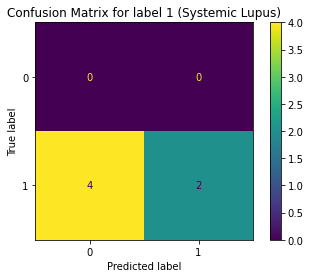

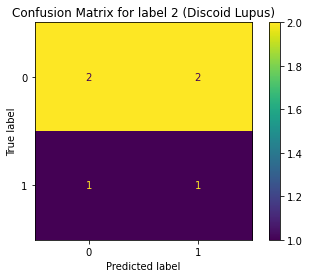

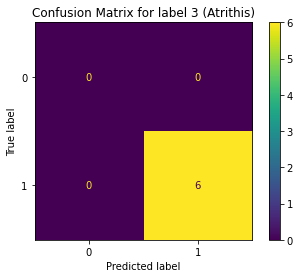

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(random_state=0)

dtclf.fit(X_train, y_train)

y_pred = dtclf.predict(X_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_pred)

#Calculate accuracy
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.3f" % acc)

cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 1 (Systemic Lupus)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 2 (Discoid Lupus)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[2], display_labels=np.unique(y_test)).plot()
plt.title('Confusion Matrix for label 3 (Atrithis)')
plt.show()

In [29]:
dtclf.score(X_test, y_test)

0.3333333333333333

In [30]:
dtclf.get_depth()

3

In [36]:
dtclf.get_n_leaves()

6

In [37]:
dtclf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [38]:
from sklearn.tree import export_text
txt_rep = export_text(dtclf)
print(txt_rep)

|--- feature_5 <= 0.54
|   |--- feature_30 <= 0.21
|   |   |--- feature_31 <= 0.72
|   |   |   |--- class: 0
|   |   |--- feature_31 >  0.72
|   |   |   |--- class: 1
|   |--- feature_30 >  0.21
|   |   |--- class: 0
|--- feature_5 >  0.54
|   |--- feature_29 <= 0.39
|   |   |--- feature_24 <= 0.74
|   |   |   |--- class: 1
|   |   |--- feature_24 >  0.74
|   |   |   |--- class: 0
|   |--- feature_29 >  0.39
|   |   |--- class: 1



In [33]:
# K-fold Cross Validation

def get_DTmodel():
    dt = DecisionTreeClassifier(random_state=0)
    return dt

def evaluate_DTmodel(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
        # define model
		model = get_DTmodel()
		# fit model
		model.fit(X_train, y_train)
		# make a prediction on the test set
		ypred = model.predict(X_test)
		# calculate accuracy
		acc = accuracy_score(y_test, ypred)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results, model

In [35]:
result, model = evaluate_DTmodel(X, y)
print('Accuracy: %.3f (%.3f)' % (np.mean(result), np.std(result)))

>0.000
>0.333
>0.333
>0.000
>0.333
>0.000
>0.333
>0.333
>0.333
>0.667
>0.667
>0.000
>0.333
>0.667
>0.333
>0.333
>0.333
>0.000
Accuracy: 0.296 (0.219)


## Comments

Here you can see the value k-fold cross validation provides. Using a single train/test split with the given parameters produces an accuracy of 66%. Using 18 different splits demonstrates that the accuracy of this tree is less than 30%.

## Conclusion

With very simple models of NN, SVC or DT we were not able to build a model that makes better predictions than a coin toss.

Regressing the features on the 3 diseases separately gives us some results to be able to reason about.